##  Step 1: Problem Understanding

## Step 2: Dataset Acquisition


Dataset Information:
Dataset name: default of credit card clients.xls

Total rows: 30,000 clients

Total columns: 25 (including ID and target)

 Download it from UCI Repository:

## Step 3: Data Loading and Initial Exploration

In [35]:
# 1. Install required libraries

import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif


In [2]:

#  2. Python Code to Load and Explore the Dataset

# Load the dataset from the Excel file
data = pd.read_csv('default of credit card clients.csv', header=1)

df = pd.DataFrame(data)

# Preview first 5 rows
print("🔹 First 5 rows of the dataset:")
print(df.head())

# Dataset shape
print(f"\n🔹 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Column names
print("\n🔹 Column names:")
print(df.columns.tolist())

# Data types
print("\n🔹 Data types:")
print(df.dtypes)

# Summary statistics
print("\n🔹 Summary statistics:")
print(df.describe())




🔹 First 5 rows of the dataset:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next m

## Step 4: Data Cleaning and Column Renaming

In [3]:
# 1. Renaming Columns

# Rename columns for easier handling
df.rename(columns={
    'PAY_0': 'PAY_1',
    'default payment next month': 'DEFAULT'
    }, inplace=True)


In [4]:
# 2. Drop the ID column

# The ID is just an identifier and has no predictive value.
df.drop('ID', axis=1, inplace=True)


In [5]:
# 3. Check for Missing Values

# Check for missing values
print("\n🔹 Missing values in each column:")
print(df.isnull().sum())



🔹 Missing values in each column:
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [6]:
# 4. Check for Duplicates

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔹 Number of duplicate rows: {duplicates}")

# Optionally drop duplicates
df.drop_duplicates(inplace=True)



🔹 Number of duplicate rows: 35


In [7]:
# 4. Check for Duplicates

print("\n🔹 Data types after cleaning:")
print(df.dtypes)



🔹 Data types after cleaning:
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object


In [8]:
# Final Cleaned Data Preview

print("\n🔹 Final column names:")
print(df.columns.tolist())

print("\n🔹 First few rows of cleaned dataset:")
print(df.head())



🔹 Final column names:
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']

🔹 First few rows of cleaned dataset:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0    

In [9]:
df.shape

(29965, 24)

## Step 5: Exploratory Data Analysis (EDA)

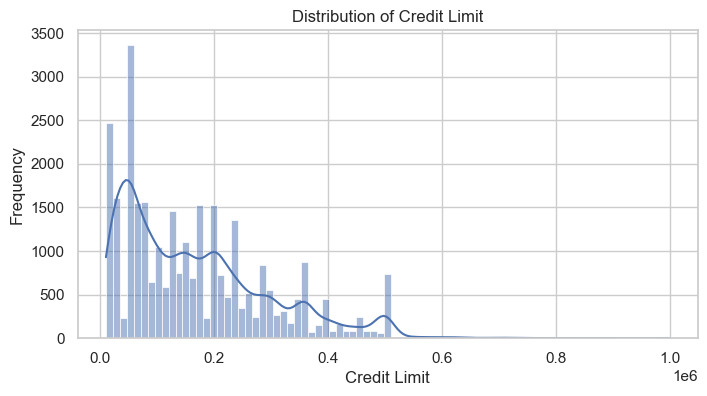

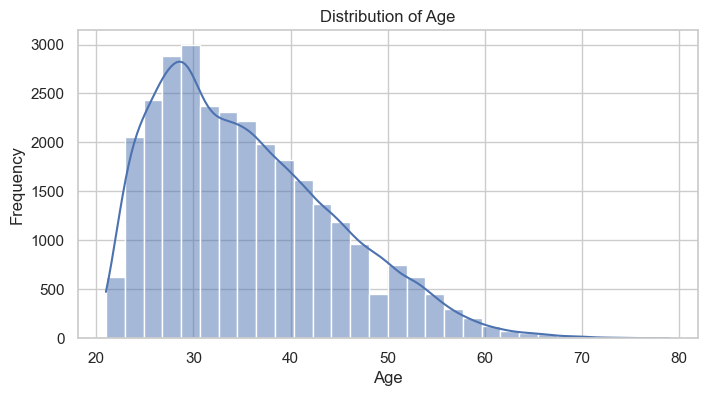

In [10]:
# 1. Univariate Analysis (Feature Distributions)

# Set style
sns.set(style='whitegrid')

# Plot distribution of credit limit
plt.figure(figsize=(8, 4))
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

# Distribution of AGE
plt.figure(figsize=(8, 4))
sns.histplot(df['AGE'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


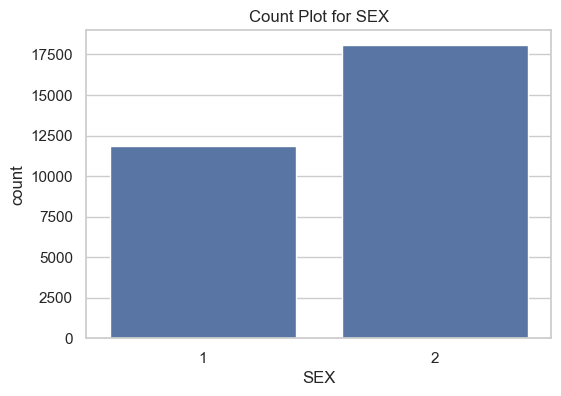

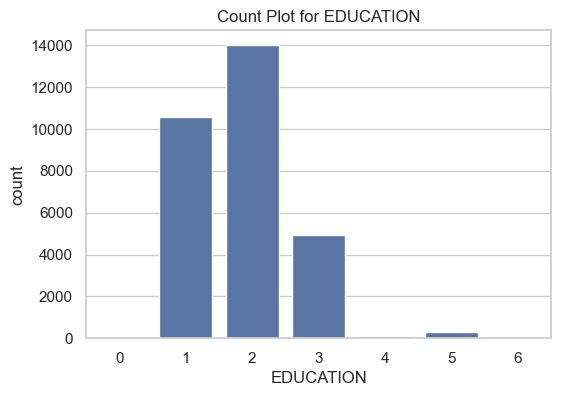

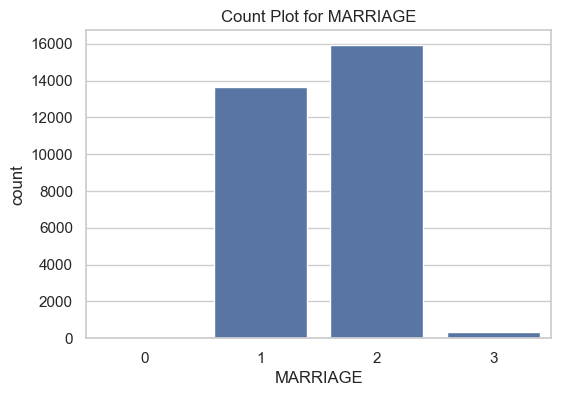

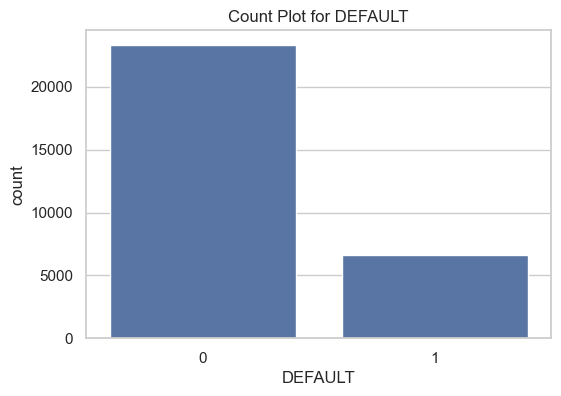

In [11]:

#  2. Categorical Feature Counts

# Bar plots for categorical variables
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var)
    plt.title(f'Count Plot for {var}')
    plt.show()


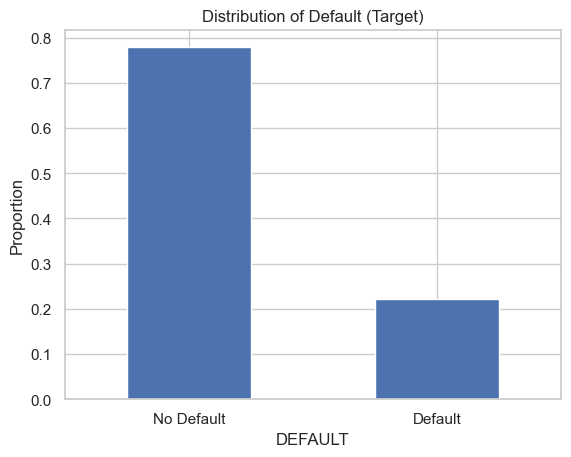

In [12]:

# 3. Target Variable Distribution

# Class distribution for DEFAULT
df['DEFAULT'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Default (Target)')
plt.xticks([0, 1], ['No Default', 'Default'], rotation=0)
plt.ylabel('Proportion')
plt.show()


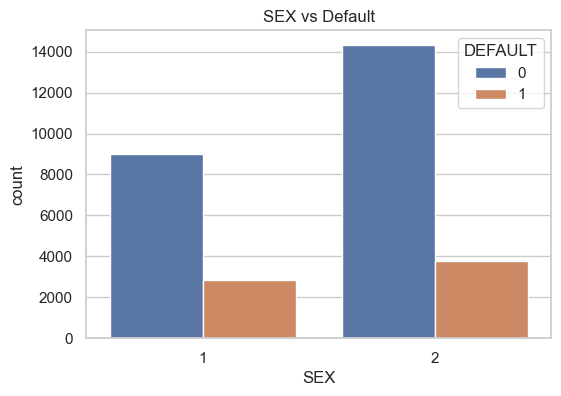

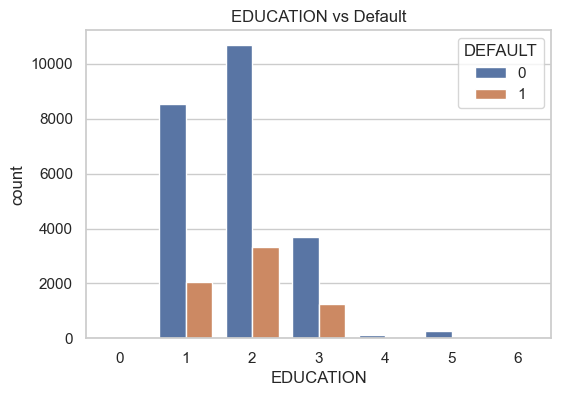

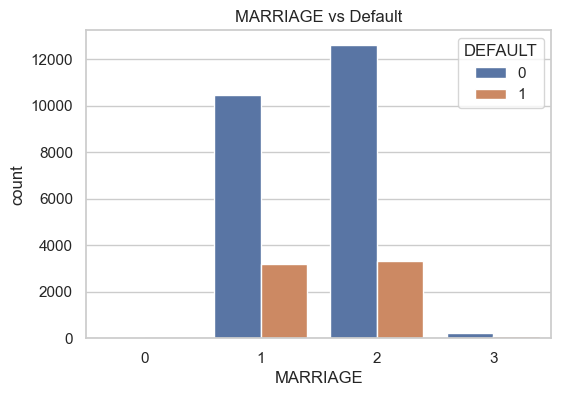

In [13]:

# 4. Bivariate Analysis: Relationship with DEFAULT

# Categorical Features vs Target

# Grouped bar plots
for var in ['SEX', 'EDUCATION', 'MARRIAGE']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, hue='DEFAULT')
    plt.title(f'{var} vs Default')
    plt.show()


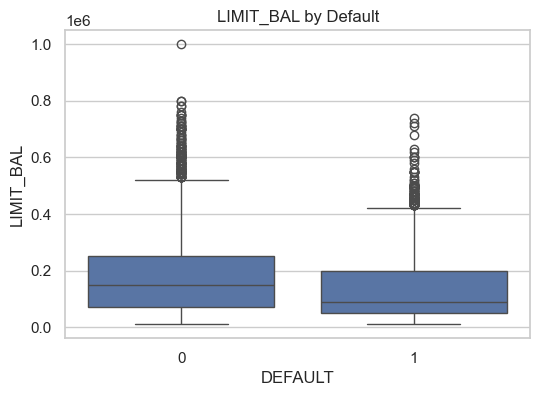

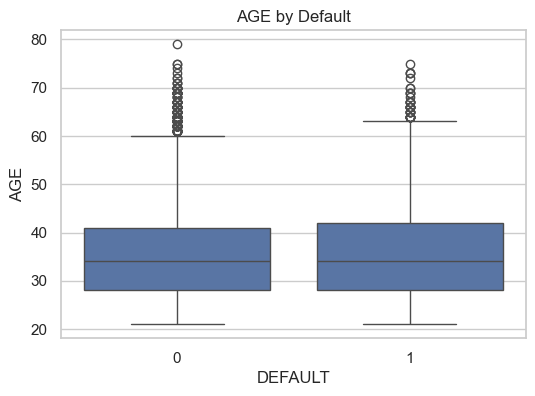

In [14]:

# Numeric Features vs Target

# Boxplots for numeric variables:

for col in ['LIMIT_BAL', 'AGE']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='DEFAULT', y=col)
    plt.title(f'{col} by Default')
    plt.show()


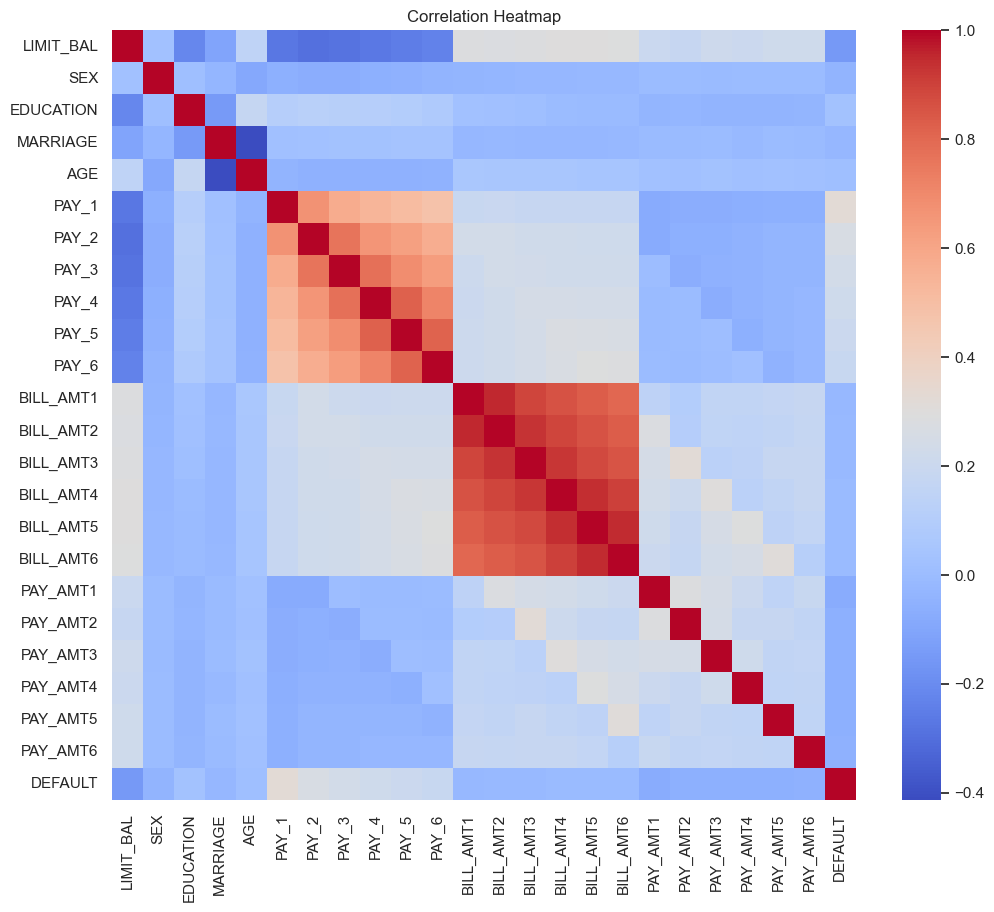

In [15]:

# 5. Correlation Matrix

# Correlation matrix

plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [16]:

# 6. Outlier Detection

# Numerical columns list
numerical_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Create summary of outliers
outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = 100 * outlier_count / len(df)
    
    outlier_summary.append({
        'Feature': col,
        'Outliers': outlier_count,
        'Outlier %': round(outlier_percent, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2)
    })

# Create and display as DataFrame
outlier_df = pd.DataFrame(outlier_summary)
print("\n📊 Outlier Summary Table:")
print(outlier_df.sort_values(by='Outlier %', ascending=False))



📊 Outlier Summary Table:
      Feature  Outliers  Outlier %  Lower Bound  Upper Bound
11   PAY_AMT4      2993       9.99      -5274.0       9590.0
13   PAY_AMT6      2960       9.88      -5672.5       9803.5
12   PAY_AMT5      2944       9.82      -5410.5       9713.5
8    PAY_AMT1      2742       9.15      -5012.0      11020.0
6   BILL_AMT5      2724       9.09     -70903.0     122937.0
9    PAY_AMT2      2723       9.09      -5375.0      11225.0
7   BILL_AMT6      2688       8.97     -70723.0     121237.0
5   BILL_AMT4      2616       8.73     -76001.5     132962.5
10   PAY_AMT3      2596       8.66      -5793.0      10695.0
4   BILL_AMT3      2469       8.24     -83524.0     146436.0
3   BILL_AMT2      2390       7.98     -88638.5     155757.5
2   BILL_AMT1      2386       7.96     -91902.5     162757.5
1         AGE       272       0.91          8.5         60.5
0   LIMIT_BAL       167       0.56    -235000.0     525000.0


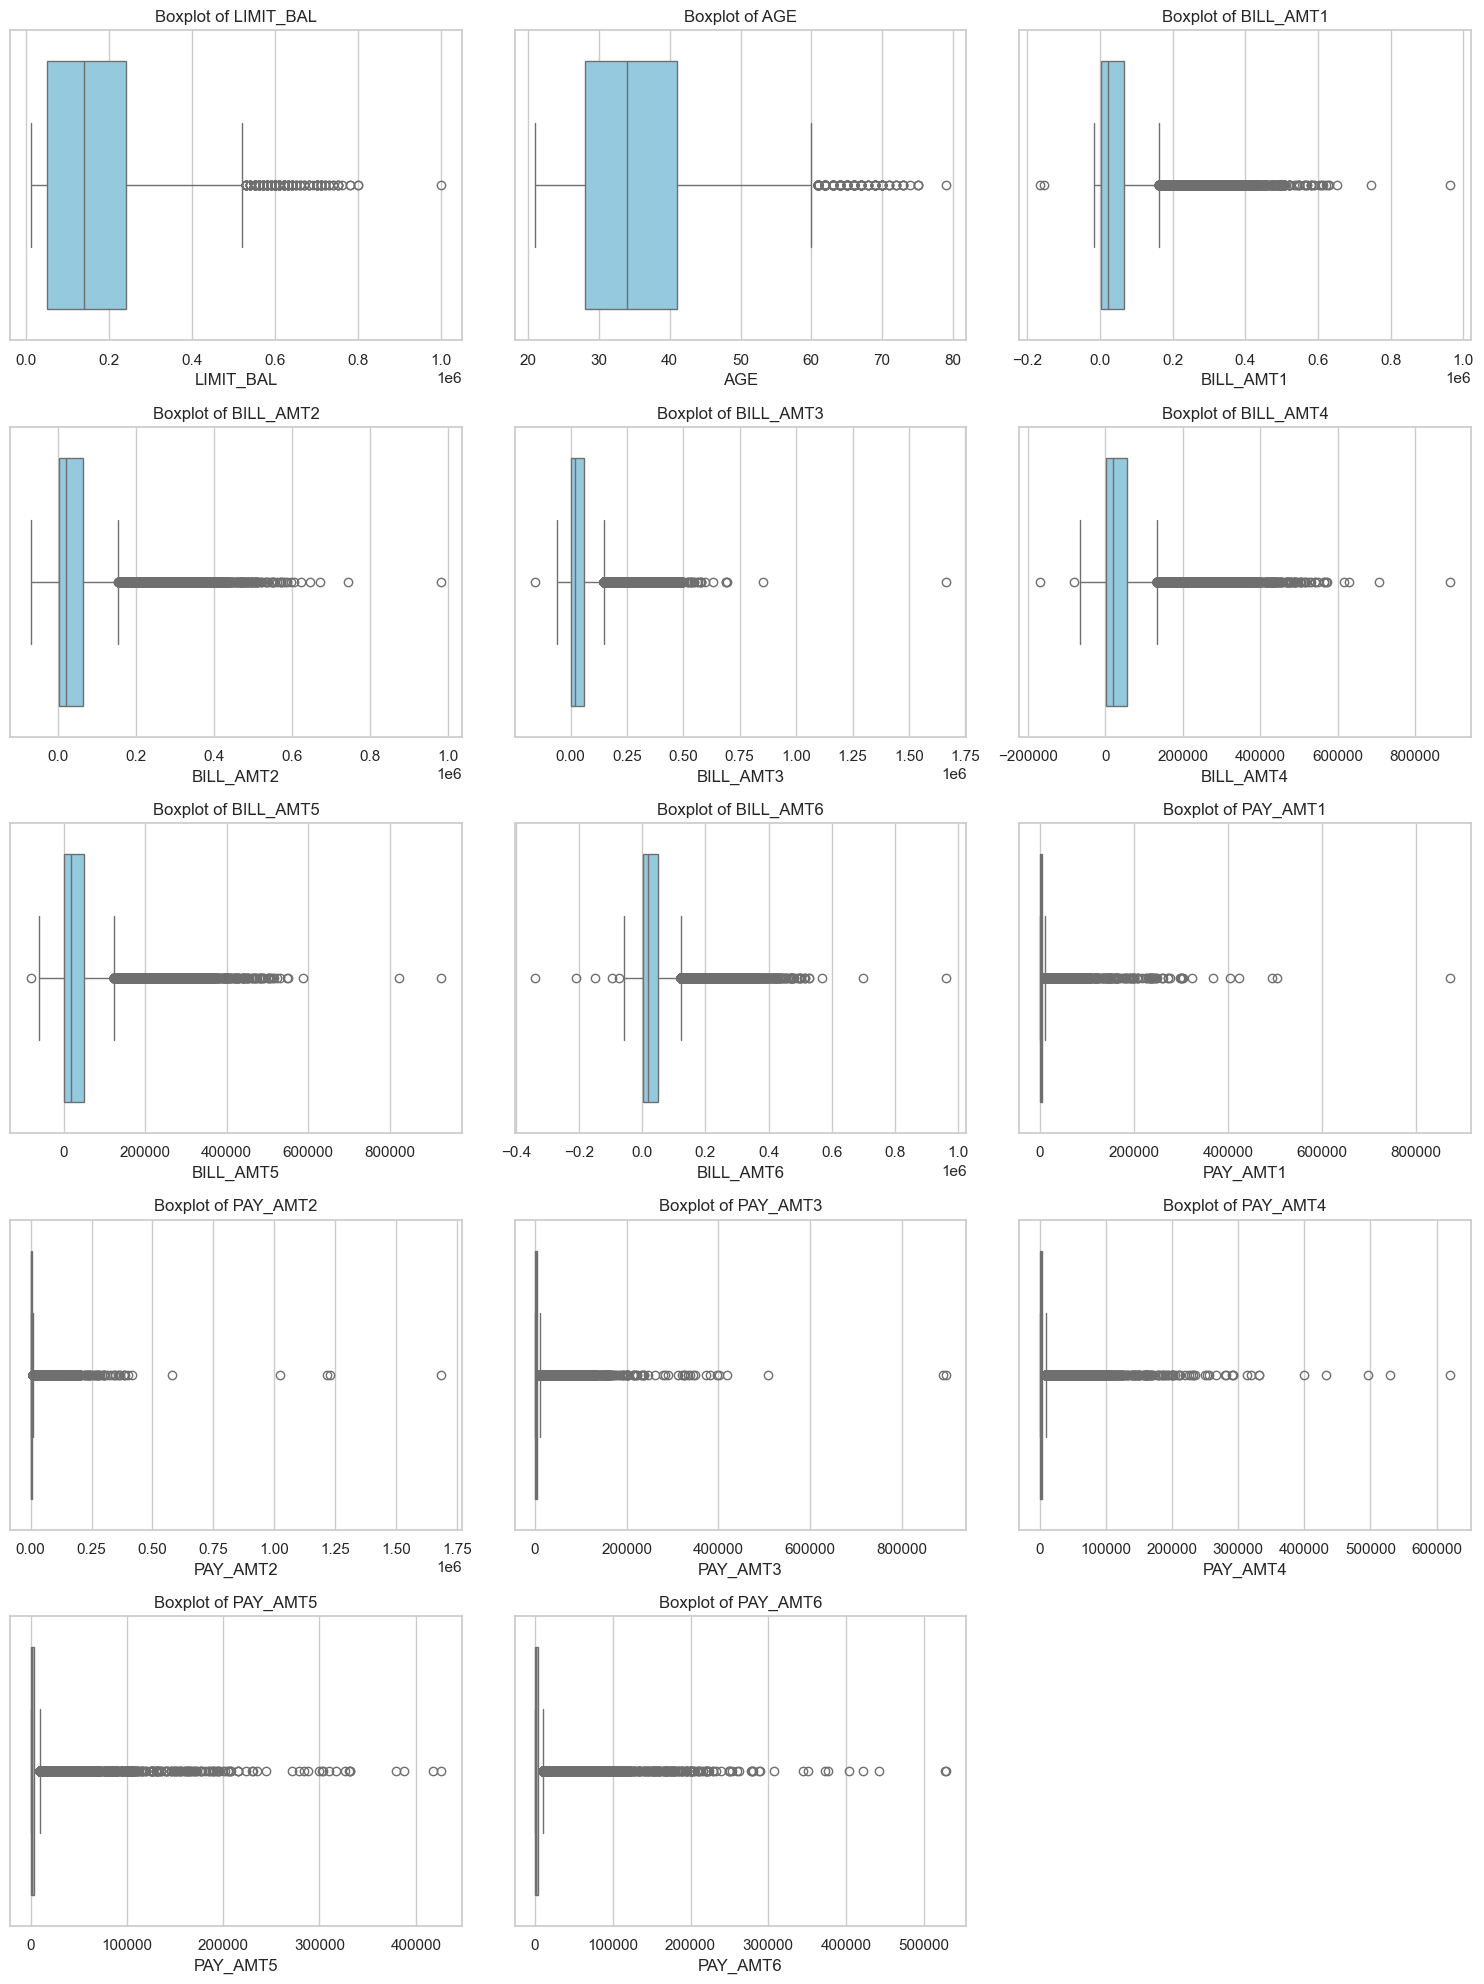

In [17]:

# Set up numeric columns again
numerical_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Plot all boxplots in a grid
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


✅ Outliers capped using IQR on a copy of the dataset.


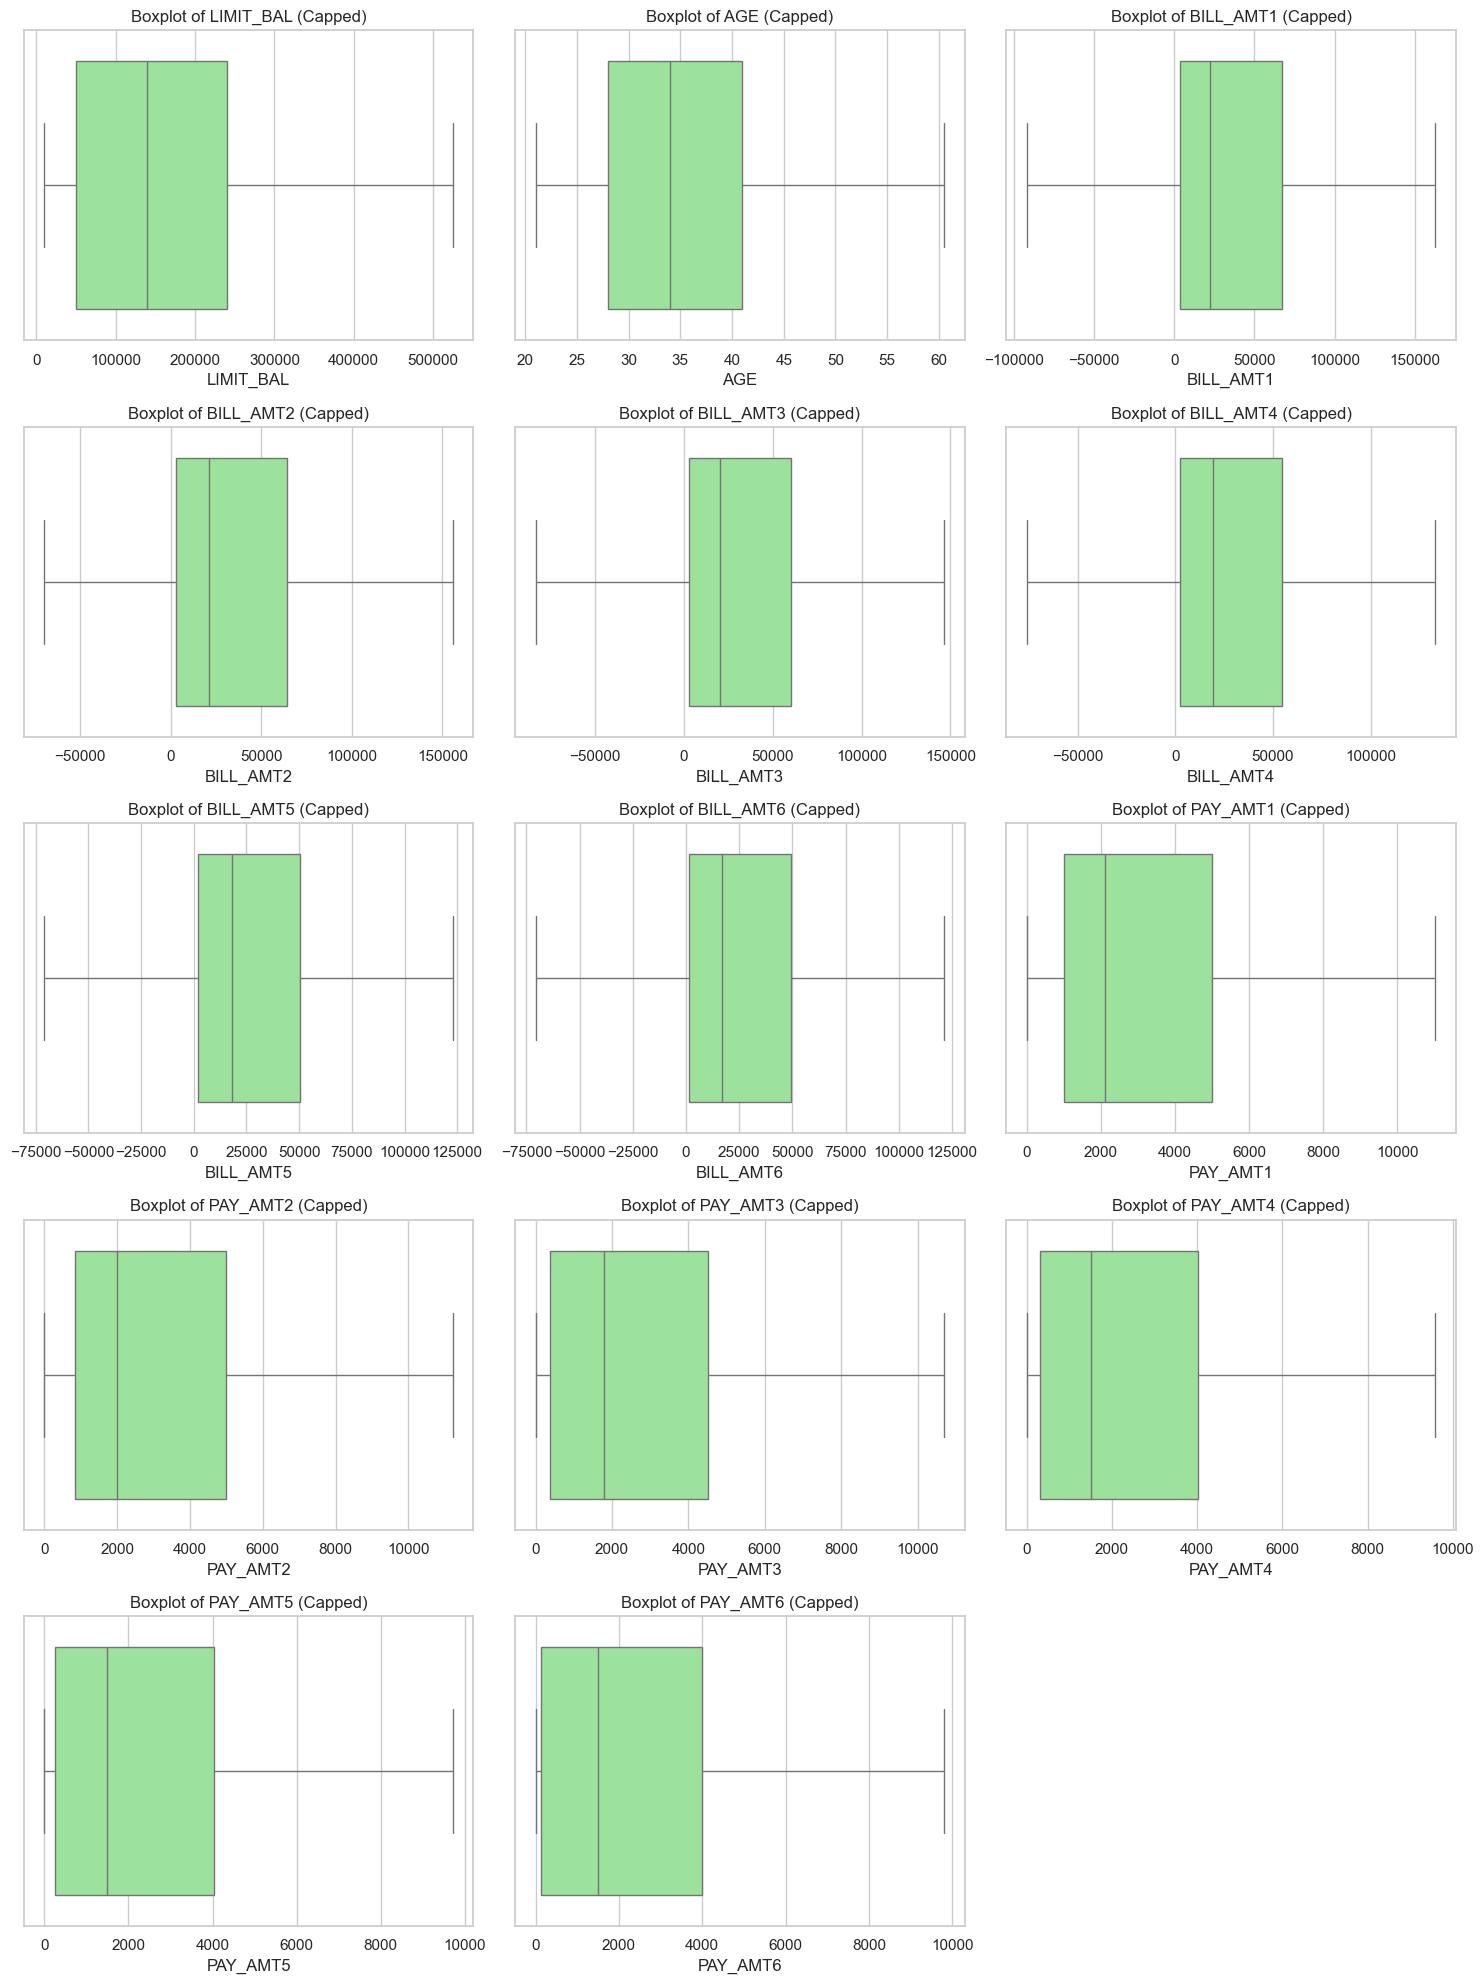

In [18]:

# Function to cap outliers using IQR

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Create a copy for capping
df_capped = df.copy()

# Apply outlier capping
for col in numerical_cols:
    df_capped = cap_outliers_iqr(df_capped, col)

print("✅ Outliers capped using IQR on a copy of the dataset.")

#  Plot boxplots after capping
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_capped, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col} (Capped)')
    plt.tight_layout()

plt.show()

In [19]:


# 7. Skewness Checking 

# Set up numeric columns again
numerical_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]


skew_vals = df[numerical_cols].skew().sort_values(ascending=False)
print("\n📈 Skewness of numerical features (descending):")
print(skew_vals)


📈 Skewness of numerical features (descending):
PAY_AMT2     30.438613
PAY_AMT3     17.208177
PAY_AMT1     14.661595
PAY_AMT4     12.898506
PAY_AMT5     11.121742
PAY_AMT6     10.635094
BILL_AMT3     3.086494
BILL_AMT5     2.874925
BILL_AMT6     2.845137
BILL_AMT4     2.820545
BILL_AMT2     2.703862
BILL_AMT1     2.662513
LIMIT_BAL     0.993491
AGE           0.732056
dtype: float64


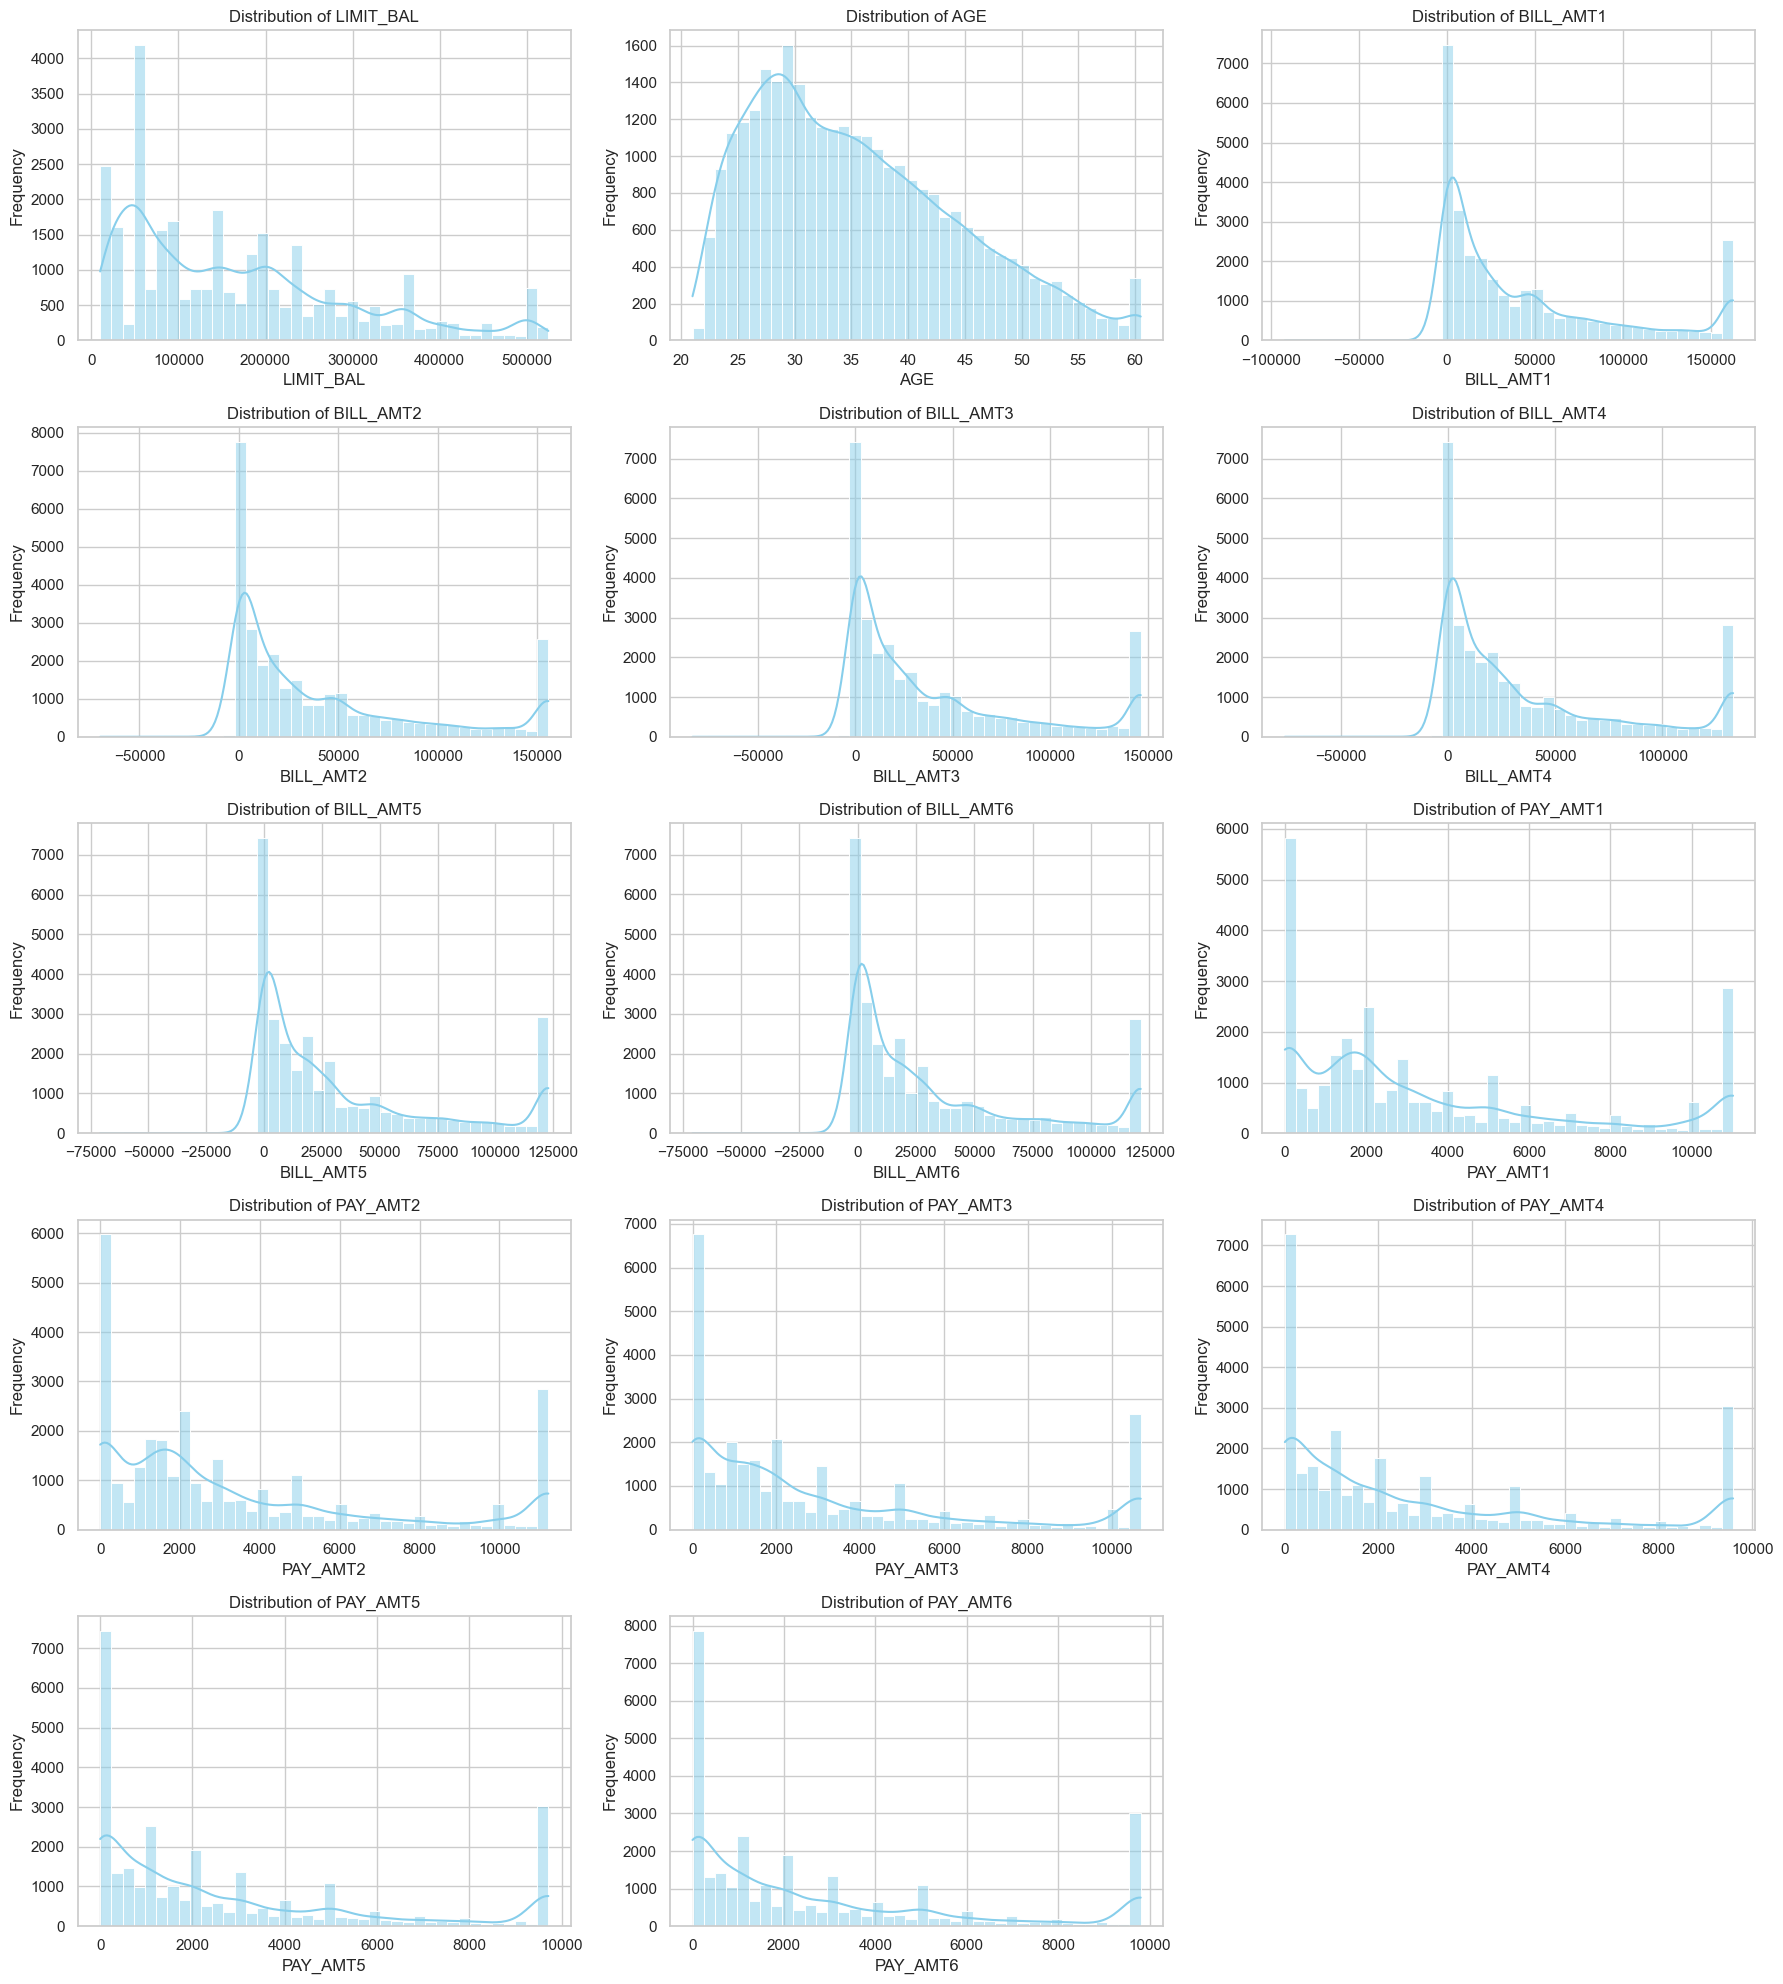

In [20]:

# Plot each numerical feature's distribution with KDE (bell curve)

n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(18, 4 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_capped[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


✅ Yeo-Johnson transformation applied. Skewness reduced.


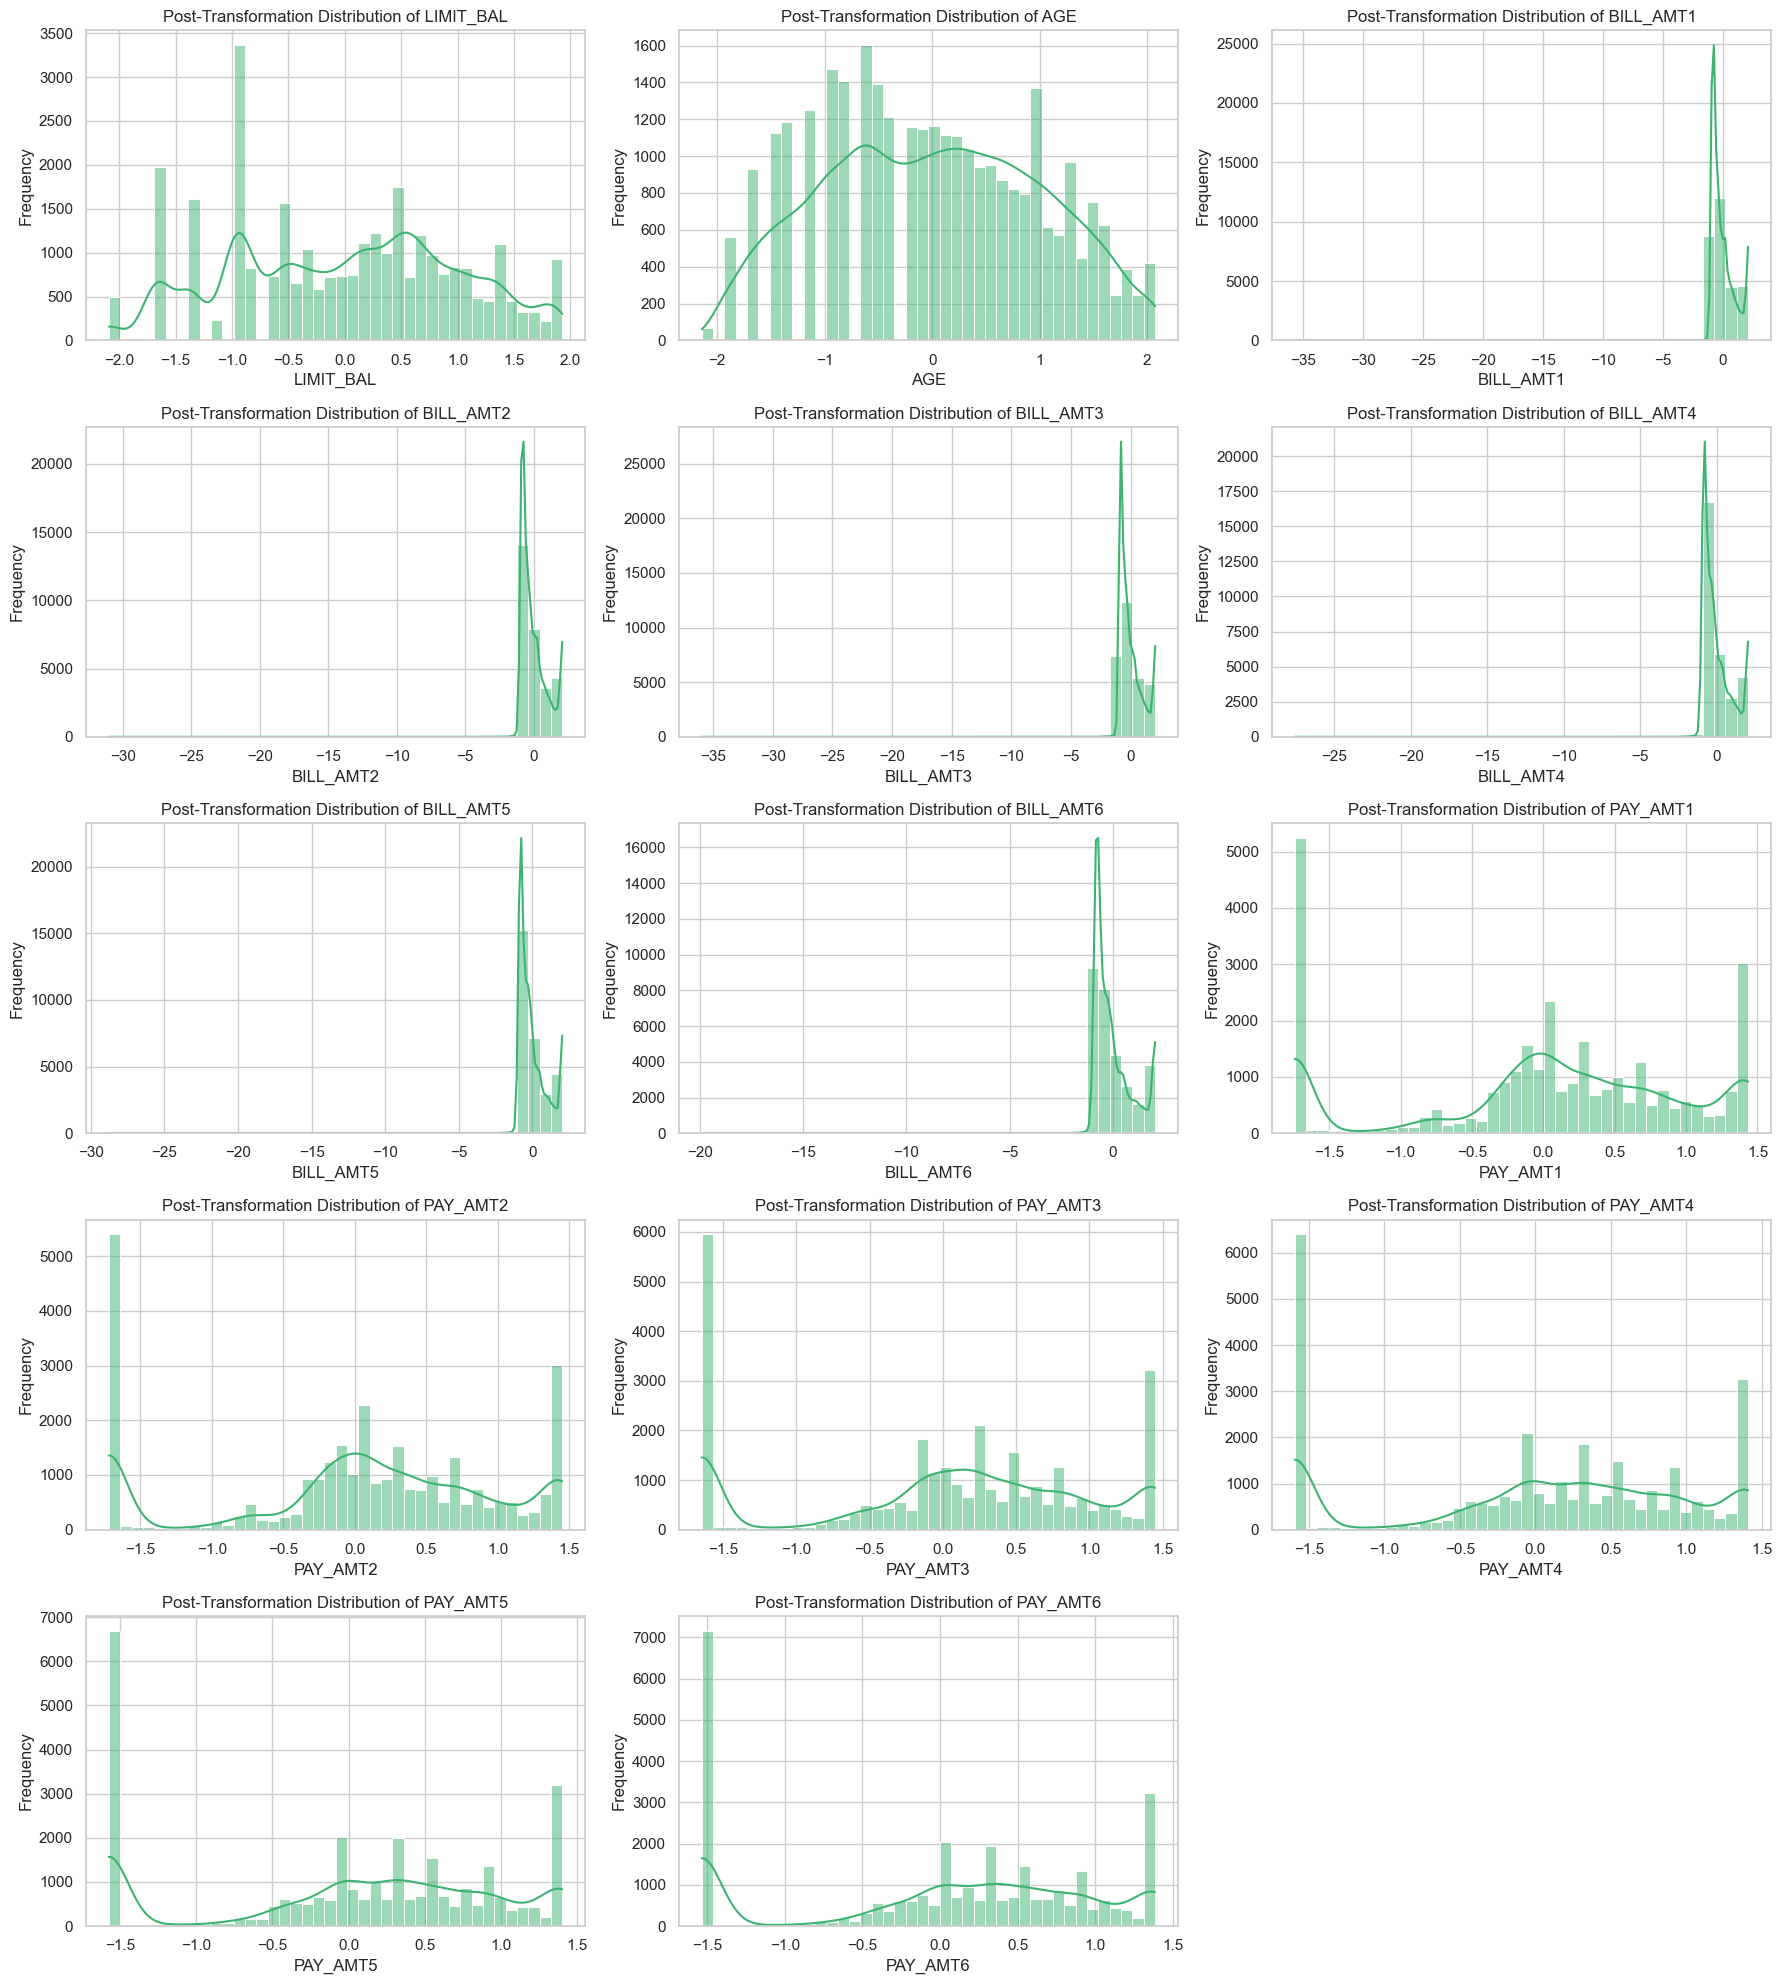

In [21]:

#  Initialize the PowerTransformer (Yeo-Johnson handles 0 or negative values)
pt = PowerTransformer(method='yeo-johnson')

# 2. Fit and transform the numerical data
transformed_data = pt.fit_transform(df_capped[numerical_cols])

# 3. Create a new DataFrame with transformed data
df_transformed = df_capped.copy()
df_transformed[numerical_cols] = transformed_data

print("✅ Yeo-Johnson transformation applied. Skewness reduced.")

# 4. Plot bell curves after transformation
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(18, 4 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_transformed[col], kde=True, bins=40, color='mediumseagreen')
    plt.title(f'Post-Transformation Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
df_transformed.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,-1.662683,2,2,1,-1.502600,2,2,-1,-1,-2,...,-0.870898,-0.857608,-0.821398,-1.741311,-0.484895,-1.643686,-1.592522,-1.573870,-1.535523,1
1,-0.092112,2,2,2,-1.134975,-1,2,0,0,0,...,-0.753879,-0.726444,-0.704029,-1.741311,-0.311921,-0.152441,-0.043245,-1.573870,0.353129,1
2,-0.399128,2,2,2,0.012154,0,0,0,0,0,...,-0.448902,-0.391837,-0.354897,-0.134435,-0.099633,-0.152441,-0.043245,-0.032015,0.901475,0
3,-0.955796,2,2,1,0.347771,0,0,0,0,0,...,-0.108703,-0.032337,0.001091,0.029018,0.073672,-0.062737,0.002609,-0.000496,0.010724,0
4,-0.955796,1,2,1,1.884939,-1,0,-1,0,0,...,-0.284343,-0.280634,-0.261146,0.029018,1.453083,1.386851,1.355816,-0.198604,-0.157347,0


In [23]:

# 8. Encoding, Scaling, and Train-Test Split

# Copy from previous processed DataFrame
df_cleaned = df_transformed.copy()


# Clean EDUCATION

print("Before cleaning EDUCATION:", df_cleaned['EDUCATION'].unique())
df_cleaned['EDUCATION'] = df_cleaned['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
print("After cleaning EDUCATION:", df_cleaned['EDUCATION'].unique())


# Clean MARRIAGE

print("\nBefore cleaning MARRIAGE:", df_cleaned['MARRIAGE'].unique())
df_cleaned['MARRIAGE'] = df_cleaned['MARRIAGE'].replace({0: 3})
print("After cleaning MARRIAGE:", df_cleaned['MARRIAGE'].unique())


# Clean SEX 

print("\nSEX values:", df_cleaned['SEX'].unique())  # Should be [1, 2]
# If 0 appears (which is rare), fix it
df_cleaned['SEX'] = df_cleaned['SEX'].replace({0: 1})


# Label encode these columns again


label_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
le = LabelEncoder()

for col in label_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

print("\n Cleaned and re-encoded: SEX, EDUCATION, MARRIAGE")


Before cleaning EDUCATION: [2 1 3 5 4 6 0]
After cleaning EDUCATION: [2 1 3 4]

Before cleaning MARRIAGE: [1 2 3 0]
After cleaning MARRIAGE: [1 2 3]

SEX values: [2 1]

 Cleaned and re-encoded: SEX, EDUCATION, MARRIAGE


In [37]:

# Separate features and target
X = df_cleaned.drop('DEFAULT', axis=1)
y = df_cleaned['DEFAULT']

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling complete using StandardScaler.")


Feature scaling complete using StandardScaler.


In [38]:
df_cleaned.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,-1.662683,1,1,0,-1.502600,2,2,-1,-1,-2,...,-0.870898,-0.857608,-0.821398,-1.741311,-0.484895,-1.643686,-1.592522,-1.573870,-1.535523,1
1,-0.092112,1,1,1,-1.134975,-1,2,0,0,0,...,-0.753879,-0.726444,-0.704029,-1.741311,-0.311921,-0.152441,-0.043245,-1.573870,0.353129,1
2,-0.399128,1,1,1,0.012154,0,0,0,0,0,...,-0.448902,-0.391837,-0.354897,-0.134435,-0.099633,-0.152441,-0.043245,-0.032015,0.901475,0
3,-0.955796,1,1,0,0.347771,0,0,0,0,0,...,-0.108703,-0.032337,0.001091,0.029018,0.073672,-0.062737,0.002609,-0.000496,0.010724,0
4,-0.955796,0,1,0,1.884939,-1,0,-1,0,0,...,-0.284343,-0.280634,-0.261146,0.029018,1.453083,1.386851,1.355816,-0.198604,-0.157347,0


In [26]:
df_cleaned.shape

(29965, 24)

In [27]:

# 80% train, 20% test with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print("Train-test split done.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train-test split done.
Training set size: 23972
Test set size: 5993


In [28]:
print("DataFrame shape:", df_cleaned.shape)
print("\n DataFrame info:")
print(df_cleaned.info())


DataFrame shape: (29965, 24)

 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29965 non-null  float64
 1   SEX        29965 non-null  int64  
 2   EDUCATION  29965 non-null  int64  
 3   MARRIAGE   29965 non-null  int64  
 4   AGE        29965 non-null  float64
 5   PAY_1      29965 non-null  int64  
 6   PAY_2      29965 non-null  int64  
 7   PAY_3      29965 non-null  int64  
 8   PAY_4      29965 non-null  int64  
 9   PAY_5      29965 non-null  int64  
 10  PAY_6      29965 non-null  int64  
 11  BILL_AMT1  29965 non-null  float64
 12  BILL_AMT2  29965 non-null  float64
 13  BILL_AMT3  29965 non-null  float64
 14  BILL_AMT4  29965 non-null  float64
 15  BILL_AMT5  29965 non-null  float64
 16  BILL_AMT6  29965 non-null  float64
 17  PAY_AMT1   29965 non-null  float64
 18  PAY_AMT2   29965 non-null  float64
 19  PAY_

In [29]:
print("\n Any missing values?")
print(df_cleaned.isnull().sum())



 Any missing values?
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [30]:
print("\n Class distribution in target (DEFAULT):")
print(df_cleaned['DEFAULT'].value_counts(normalize=True))



 Class distribution in target (DEFAULT):
DEFAULT
0    0.778742
1    0.221258
Name: proportion, dtype: float64


In [31]:
print("\n First 5 rows of preprocessed data:")
print(df_cleaned.head())



 First 5 rows of preprocessed data:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0  -1.662683    1          1         0 -1.502600      2      2     -1     -1   
1  -0.092112    1          1         1 -1.134975     -1      2      0      0   
2  -0.399128    1          1         1  0.012154      0      0      0      0   
3  -0.955796    1          1         0  0.347771      0      0      0      0   
4  -0.955796    0          1         0  1.884939     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...  -0.870898  -0.857608  -0.821398 -1.741311 -0.484895 -1.643686   
1      0  ...  -0.753879  -0.726444  -0.704029 -1.741311 -0.311921 -0.152441   
2      0  ...  -0.448902  -0.391837  -0.354897 -0.134435 -0.099633 -0.152441   
3      0  ...  -0.108703  -0.032337   0.001091  0.029018  0.073672 -0.062737   
4      0  ...  -0.284343  -0.280634  -0.261146  0.029018  1.453083  1.386851   

 

In [32]:

# Optional: Convert scaled array back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n First 5 rows of scaled features:")
print(X_scaled_df.head())



 First 5 rows of scaled features:
   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1     PAY_2  \
0  -1.662683  0.810153   0.211216 -1.068776 -1.502600  1.795105  1.782037   
1  -0.092112  0.810153   0.211216  0.849055 -1.134975 -0.875185  1.782037   
2  -0.399128  0.810153   0.211216  0.849055  0.012154  0.014912  0.110218   
3  -0.955796  0.810153   0.211216 -1.068776  0.347771  0.014912  0.110218   
4  -0.955796 -1.234334   0.211216 -1.068776  1.884939 -0.875185  0.110218   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0 -0.698752 -0.668642 -1.532847  ...  -0.855100  -0.870898  -0.857608   
1  0.137468  0.187408  0.233623  ...  -0.789237  -0.753879  -0.726444   
2  0.137468  0.187408  0.233623  ...  -0.501163  -0.448902  -0.391837   
3  0.137468  0.187408  0.233623  ...   0.274883  -0.108703  -0.032337   
4 -0.698752  0.187408  0.233623  ...  -0.002364  -0.284343  -0.280634   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5 

## Step 6 : Feature Selection

In [36]:


# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # test all features
selector.fit(X_scaled, y)

# Create DataFrame of scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_score': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values(by='F_score', ascending=False)

# Show top features
print("Features ranked by F-score:")
print(feature_scores)


Features ranked by F-score:
      Feature      F_score        p_value
5       PAY_1  3537.724969   0.000000e+00
6       PAY_2  2238.472766   0.000000e+00
7       PAY_3  1755.067848   0.000000e+00
8       PAY_4  1474.225839  6.758799e-315
9       PAY_5  1301.873328  4.212965e-279
10      PAY_6  1082.612913  2.838076e-233
0   LIMIT_BAL   908.428065  1.251381e-196
17   PAY_AMT1   895.808185  5.762474e-194
18   PAY_AMT2   747.383122  1.474966e-162
19   PAY_AMT3   624.437047  2.026674e-136
20   PAY_AMT4   508.312128  1.255768e-111
22   PAY_AMT6   429.262252   1.086275e-94
21   PAY_AMT5   403.092214   4.510746e-89
1         SEX    47.398368   5.907211e-12
2   EDUCATION    34.395087   4.545740e-09
3    MARRIAGE    22.280289   2.366766e-06
11  BILL_AMT1    19.913200   8.133385e-06
13  BILL_AMT3    12.666420   3.728571e-04
12  BILL_AMT2    10.341121   1.302370e-03
14  BILL_AMT4     8.261207   4.052969e-03
15  BILL_AMT5     4.438165   3.515230e-02
16  BILL_AMT6     1.726245   1.889013e-01
4     